# Union-Find data structure

In [10]:
from collections import defaultdict


class MakeUnionFind(object):
    def __init__(self):
        self.components = {}
        self.member = defaultdict(list)
        self.size = defaultdict(int)
        
    def make_union_find(self, vertices):
        
        for vertex in range(vertices):
            self.components[vertex] = vertex
            self.member[vertex].append(vertex)
            self.size[vertex] = 1
    def find(self, vertex):
        return self.components[vertex]
    def union(self, parent , child):
        
        c_parent = self.components[parent]
        c_child = self.components[child]
        
        if self.size[c_child] >= self.size[c_parent]:
            for vertex in self.member[c_parent]:
                self.components[vertex] = c_child
                self.member[c_child].append(vertex)
                self.size[c_child]+=1
        else:
             for vertex in self.member[c_child]:
                self.components[vertex] = c_parent
                self.member[c_parent].append(vertex)
                self.size[c_parent]+=1
        

In [11]:
def kruskal(WList):
    (edges,TE) = ([],[])
    for u in WList.keys():
        edges.extend([(d,u,v) for (v,d) in WList[u]])
    edges.sort()
    mf = MakeUnionFind()
    mf.make_union_find(len(WList.keys()))
    for to_distance , parent , child in edges:
        if mf.components[parent]!= mf.components[child]:
            mf.union(parent=parent, child=child)
            TE.append((parent,child,to_distance))
        if mf.size[mf.components[parent]] == len(WList.keys()) or mf.size[mf.components[child]] == len(WList.keys()):
                break 
    return TE

In [12]:
edge = [(0,1,10),(0,2,18),(0,3,6),(0,4,20),(0,5,13),(1,2,10),(1,3,10),(1,4,5),(1,5,7),(2,3,2),(2,4,14),(2,5,15),(3,4,17),(3,5,12),(4,5,10)]

size = 6
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edge:
    WL[i].append((j,d))
print(kruskal(WL))

[(2, 3, 2), (1, 4, 5), (0, 3, 6), (1, 5, 7), (0, 1, 10)]


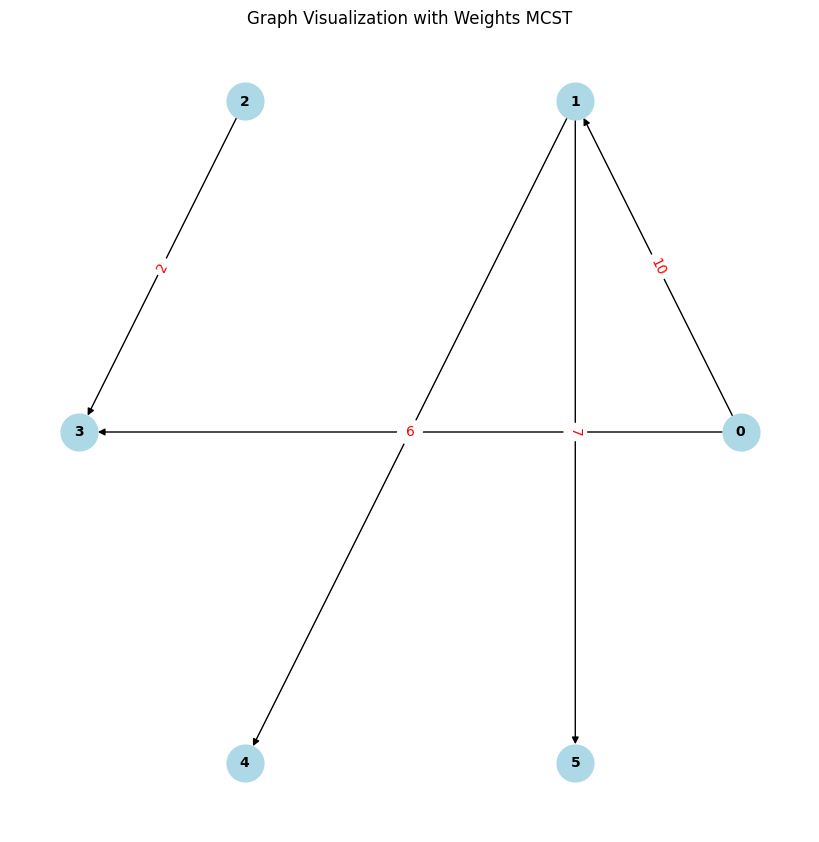

In [14]:
import matplotlib.pyplot as plt 
import networkx as nx 
import numpy as np 

mcst_list = kruskal(WL)
G = nx.DiGraph()

# Add edges to the graph
for (i, j, w) in mcst_list:
    G.add_edge(i, j, weight=w)

# Define positions for nodes in a circular layout
pos = {i: (np.cos(2 * np.pi * i / size), np.sin(2 * np.pi * i / size)) for i in range(size)}

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = {(i, j): w for (i, j, w) in mcst_list}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.title("Graph Visualization with Weights MCST")
plt.show()

In [4]:
class MaxHeap:
    def __init__(self) -> None:
        self.A = []
        
    def max_heapify(self, parent_index):
        left_child_index = 2*parent_index+1
        right_child_index = 2*parent_index+2
        largest = parent_index
        if left_child_index < len(self.A) and self.A[left_child_index] > self.A[parent_index]:
            largest = left_child_index
        if right_child_index < len(self.A) and self.A[right_child_index] > self.A[parent_index]:
            largest = right_child_index
        if largest !=parent_index:
            self.A[parent_index] , self.A[largest] = self.A[largest] , self.A[parent_index]
            self.max_heapify(largest)

    def build_max_heap(self,List_of_value ):
        
        self.A = []
        
        for value in List_of_value:
            self.A.append(value)
        midpoint = int((len(self.A)//2)-1)
        
        for index in range(midpoint, -1 , -1):
            self.max_heapify(index)
    
    def delete_max(self):
        item = None
        if self.A !=[]:
            self.A[0] , self.A[-1] = self.A[-1], self.A[0]
            item = self.A.pop()
            self.max_heapify(0)
        return item
    def insert_in_max_heap(self, value_to_insert):
        self.A.append(value_to_insert)
        index_to_heap = len(self.A) -1 
        while index_to_heap > 0 :
            parent_index = (index_to_heap-1)//2
            if self.A[index_to_heap] > self.A[parent_index]:
                self.A[index_to_heap] , self.A[parent_index] = self.A[parent_index] , self.A[index_to_heap]
                index_to_heap = parent_index
            else:
                break 
            
            
            
            

In [5]:

heap = MaxHeap()
heap.build_max_heap([1,2,3,4,5,6])
print(heap.A)
heap.insert_in_max_heap(7)
print(heap.A)
heap.insert_in_max_heap(8)
print(heap.A)
print(heap.delete_max())
print(heap.delete_max())
print(heap.A)

[6, 5, 3, 4, 2, 1]
[7, 5, 6, 4, 2, 1, 3]
[8, 7, 6, 5, 2, 1, 3, 4]
8
6
[4, 7, 3, 5, 2, 1]


In [2]:
class MinHeap:
    def __init__(self) -> None:
        self.A = []
        
    def min_heapify(self, parent_index):
        left_child_index = 2*parent_index+1
        right_child_index = 2*parent_index+2
        smallest = parent_index
        if left_child_index < len(self.A) and self.A[left_child_index] < self.A[parent_index]:
            smallest = left_child_index
        if right_child_index < len(self.A) and self.A[right_child_index] < self.A[parent_index]:
            smallest = right_child_index
        if smallest !=parent_index:
            self.A[parent_index] , self.A[smallest] = self.A[smallest] , self.A[parent_index]
            self.min_heapify(smallest)

    def build_min_heap(self,List_of_value ):
        
        self.A = []
        
        for value in List_of_value:
            self.A.append(value)
        midpoint = int((len(self.A)//2)-1)
        
        for index in range(midpoint, -1 , -1):
            self.min_heapify(index)
    
    def delete_min(self):
        item = None
        if self.A !=[]:
            self.A[0] , self.A[-1] = self.A[-1], self.A[0]
            item = self.A.pop()
            self.min_heapify(0)
        return item
    def insert_in_min_heap(self, value_to_insert):
        self.A.append(value_to_insert)
        index_to_heap = len(self.A) -1 
        while index_to_heap > 0 :
            parent_index = (index_to_heap-1)//2
            if self.A[index_to_heap] < self.A[parent_index]:
                self.A[index_to_heap] , self.A[parent_index] = self.A[parent_index] , self.A[index_to_heap]
                index_to_heap = parent_index
            else:
                break 

In [3]:
heap = MinHeap()
heap.build_min_heap([6,5,4,3,2])
print(heap.A)
heap.insert_in_min_heap(1)
print(heap.A)
heap.insert_in_min_heap(8)
print(heap.A)
print(heap.delete_min())
print(heap.delete_min())
print(heap.A)

[4, 2, 6, 3, 5]
[1, 2, 4, 3, 5, 6]
[1, 2, 4, 3, 5, 6, 8]
1
4
[6, 2, 8, 3, 5]


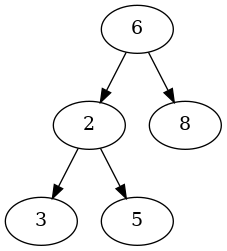

In [9]:
from IPython.display import Image
import graphviz
import uuid
import os 
from pathlib import Path 


class HeapVisualizer:
  def __init__(self, heap):
      self.heap = heap
      self.graph = graphviz.Digraph()

  def add_edges(self, index=0):
      if index >= len(self.heap):
          return

      left_index = 2 * index + 1
      right_index = 2 * index + 2

      if left_index < len(self.heap):
          self.graph.edge(str(self.heap[index]), str(self.heap[left_index]))
          self.add_edges(left_index)

      if right_index < len(self.heap):
          self.graph.edge(str(self.heap[index]), str(self.heap[right_index]))
          self.add_edges(right_index)

  def visualize(self):
      for node in self.heap:
          self.graph.node(str(node))
      self.add_edges()
      return self.graph
# Generate a UUID
unique_id = uuid.uuid4()

# Convert UUID to a string
unique_id_str = str(unique_id)

# Create a file path using the UUID string
file_path = os.path.join(os.getcwd(), f"{unique_id_str}.png")

visualizer = HeapVisualizer(heap.A)
graph = visualizer.visualize()
graph.render(unique_id_str, format='png', view=False)

# Display the image
Image(file_path)

In [11]:
class Tree:
    
    def __init__(self , init_val = None) -> None:
        self.value = init_val
        if self.value:
            self.left = Tree()
            self.right = Tree()
        else:
            self.left = None 
            self.right = None 
            
    def isempty(self):
        return self.value == None 
    
    def isleaf(self):
        
        return self.value != None and self.left.isempty() and self.right.isempty()
    
    def inorder(self):
        if self.isempty():
            return[]
        return self.left.inorder() + [self.value] + [self.right.inorder()]
    
    def __str__(self) -> str:
        return str(self.inorder())
    
    def find(self , value_to_find):
        if self.isempty():
            return False 
        if self.value == value_to_find:
            return True
        if value_to_find > self.value:
            return self.right.find(value_to_find=value_to_find)
        if value_to_find < self.value:
            return self.left.find(value_to_find=value_to_find)
    def findmin(self):
        if self.left.isempty():
            return self.value
        else:
            self.left.findmin()
    def maxval(self):
        
        if self.right.isempty():
            return(self.value)
        else:
            return(self.right.maxval())      
    def minval(self):
        if self.left.isempty():
            return(self.value)
        else:
            return(self.left.minval())
        
    def insert(self,v):
        if self.isempty():
            self.value = v
            self.left = Tree()
            self.right = Tree()
        if self.value == v:
            return
        if v < self.value:
            self.left.insert(v)
            return
        if v > self.value:
            self.right.insert(v)
            return
    def delete(self,v):
        if self.isempty():
            return
        if v < self.value:
            self.left.delete(v)
            return
        if v > self.value:
            self.right.delete(v)
            return
        if v == self.value:
            if self.isleaf():
                self.makeempty()
            elif self.left.isempty():
                self.copyright()
            elif self.right.isempty():
                self.copyleft()
            else:
                self.value = self.left.maxval()
                self.left.delete(self.left.maxval())
            return
    # Convert leaf node to empty node
    def makeempty(self):
        self.value = None
        self.left = None
        self.right = None
        return
    # Promote left child
    def copyleft(self):
        self.value = self.left.value
        self.right = self.left.right
        self.left = self.left.left
        return
    # Promote right child
    def copyright(self):
        self.value = self.right.value
        self.left = self.right.left
        self.right = self.right.right
        return

    

T = Tree()
bst = [9,8,7,6,5,4,3,2,1]
k = 4
for i in bst:
    T.insert(i)
print('Element in BST are:= ',T.inorder())
print('Maximum element in BST are:= ',T.maxval())
print('Minimum element in BST are:= ',T.minval())
print(k,'is present or not = ',T.find(k))
T.delete(3)
print('Element in BST after delete 3:= ',T.inorder())

Element in BST are:=  [1, [], 2, [], 3, [], 4, [], 5, [], 6, [], 7, [], 8, [], 9, []]
Maximum element in BST are:=  9
Minimum element in BST are:=  1
4 is present or not =  True
Element in BST after delete 3:=  [1, [], 2, [], 4, [], 5, [], 6, [], 7, [], 8, [], 9, []]


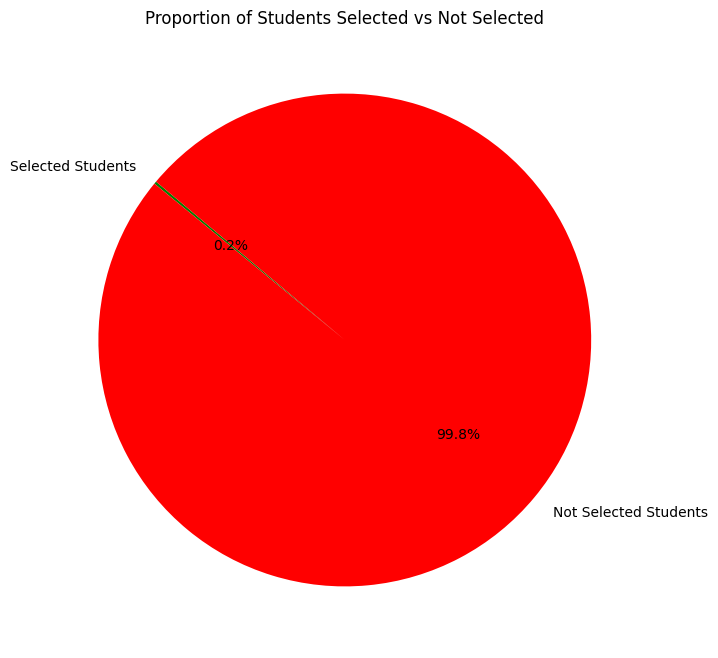

In [15]:
import matplotlib.pyplot as plt

# Data
total_students = 1800000
selected_students = 3000
not_selected_students = total_students - selected_students

# Labels and values
labels = ['Selected Students', 'Not Selected Students']
values = [selected_students, not_selected_students]
colors = ['green', 'red']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Title
plt.title('Proportion of Students Selected vs Not Selected')

# Show the plot
plt.show()